# **Data Mining Project**

---
Name: Fajrur Rahman Suprapto

## **Ecommerce Dataset**

This dataset contain behavior data on October 2019 from a large multi-category online store. There are 9 columns and 42448764 rows in this dataset. The dataset can be found on [Kaggle](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store).

## **Business Questions**

This project focus on 5 questions below:
1. Most popular categories and brands
2. Most purchased categories and brands
3. Most customers with the highest number of purchase
4. Daily visit
5. Costumers Activity

## **Import Library**

In [1]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Read the Data**

In [3]:
# mount to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import kaggle API
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
# change folder
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# download dataset
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.29G/4.29G [01:23<00:00, 109MB/s]
100% 4.29G/4.29G [01:23<00:00, 55.3MB/s]


In [ ]:
# check file in folder
!ls

2019-Oct.csv  kaggle.json  water_potability.csv


In [ ]:
# unzip and delete the zip file
!unzip ecommerce-behavior-data-from-multi-category-store.zip  && rm ecommerce-behavior-data-from-multi-category-store.zip

Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


In [2]:
# read the data
df = pd.read_csv('2019-Oct.csv')
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


## **Exploratory Data Analysis**

In [ ]:
# simple data checking - get general information from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [3]:
# transform event_time column to datetime
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_convert(None)

In [4]:
# transform event_type and category_code column to category
df['event_type'] = df['event_type'].astype('category')
df['category_code'] = df['category_code'].astype('category')

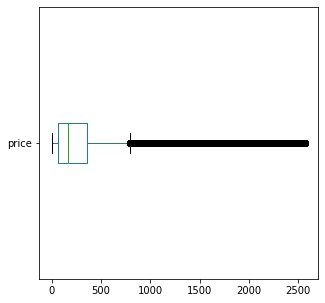

In [ ]:
# check outlier using boxplot
df.boxplot(column = ['price'], figsize = (5, 5), grid = False, vert = False)

## **Exploring the Data**

### **Most Popular Categories**

Text(0, 0.5, 'Total')

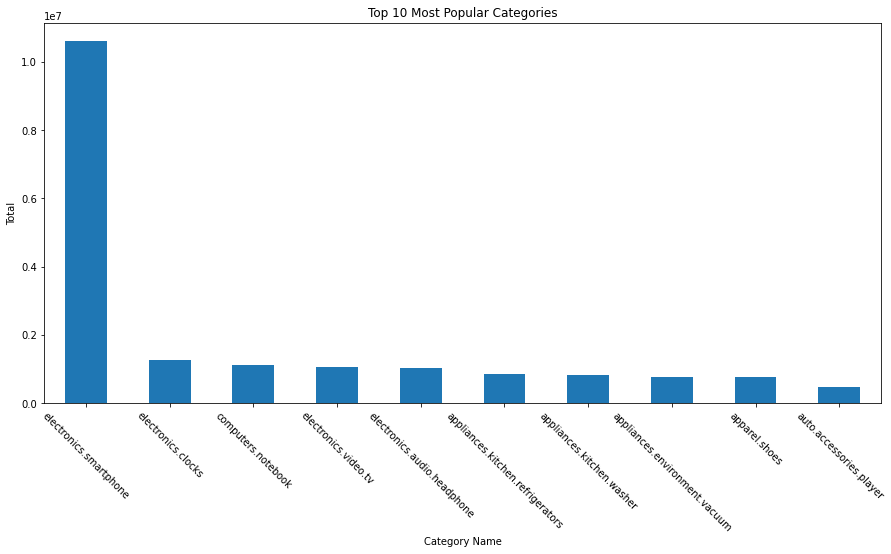

In [ ]:
# visualize the 10 most popular categories
view = df.loc[df.event_type == 'view']
view['category_code'].value_counts().head(10).plot.bar(figsize = (15,7))
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category Name')
plt.xticks(rotation = 315)
plt.ylabel('Total')

### **Most Popular Brands**

Text(0, 0.5, 'Total')

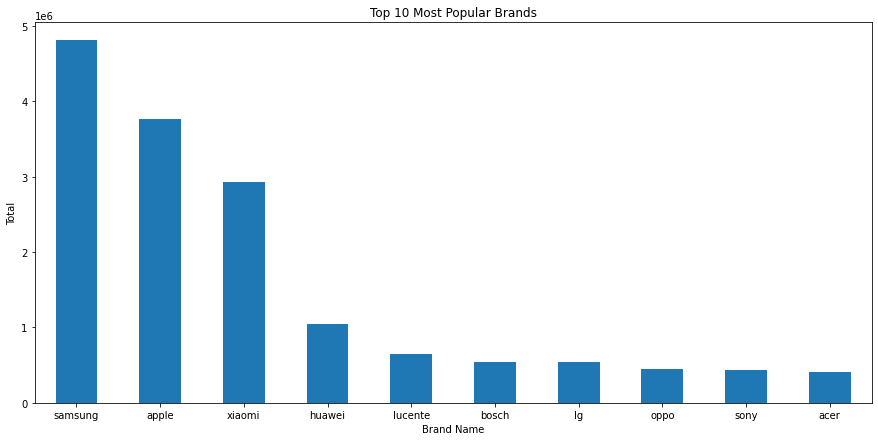

In [ ]:
# visualize the 10 most popular brands
view = df.loc[df.event_type == 'view']
view['brand'].value_counts().head(10).plot.bar(figsize = (15,7))
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brand Name')
plt.xticks(rotation = 360)
plt.ylabel('Total')

### **Most Purchased Categories**

Text(0, 0.5, 'Total')

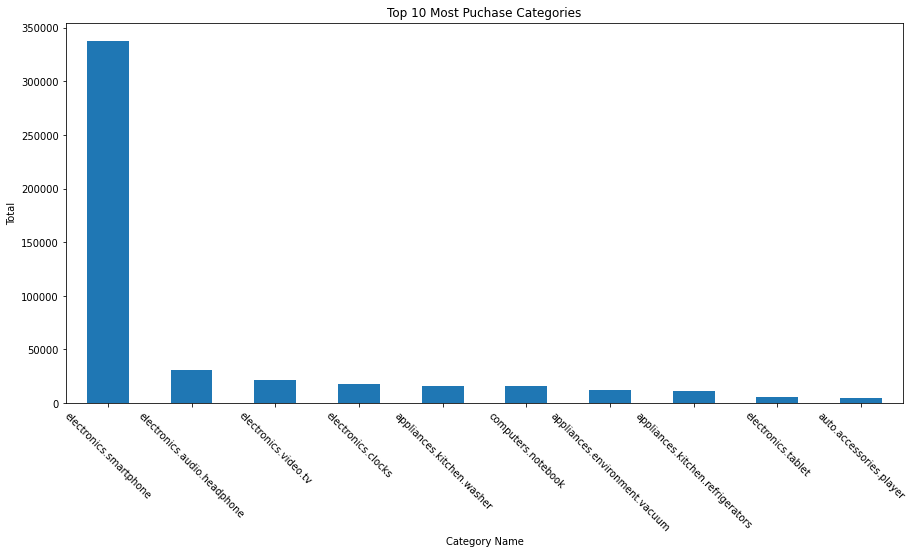

In [ ]:
# visualize the 10 most purchase categories
purchase = df.loc[df.event_type == 'purchase']
purchase['category_code'].value_counts().head(10).plot.bar(figsize = (15,7))
plt.title('Top 10 Most Puchase Categories')
plt.xlabel('Category Name')
plt.xticks(rotation = 315)
plt.ylabel('Total')

### **Most Purchased Brands**

Text(0, 0.5, 'Total')

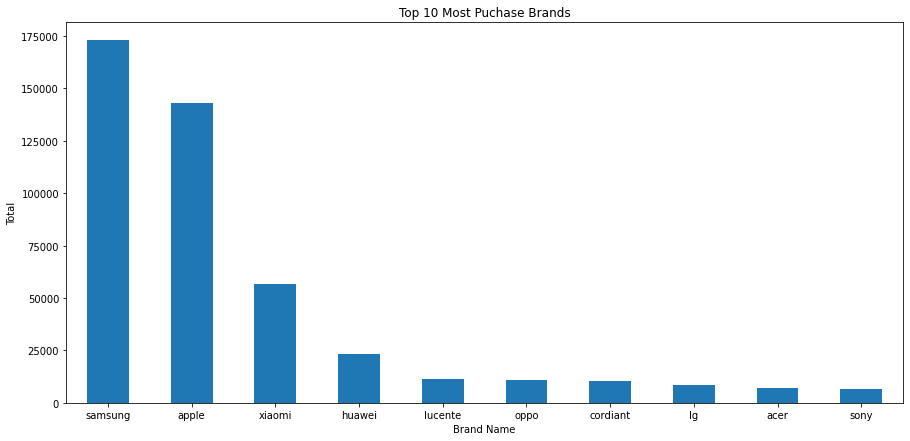

In [ ]:
# visualize the 10 most purchase brands
purchase = df.loc[df.event_type == 'purchase']
purchase['brand'].value_counts().head(10).plot.bar(figsize = (15,7))
plt.title('Top 10 Most Puchase Brands')
plt.xlabel('Brand Name')
plt.xticks(rotation = 360)
plt.ylabel('Total')

### **Most Customer with Highest Purchase**

Text(0, 0.5, 'Total')

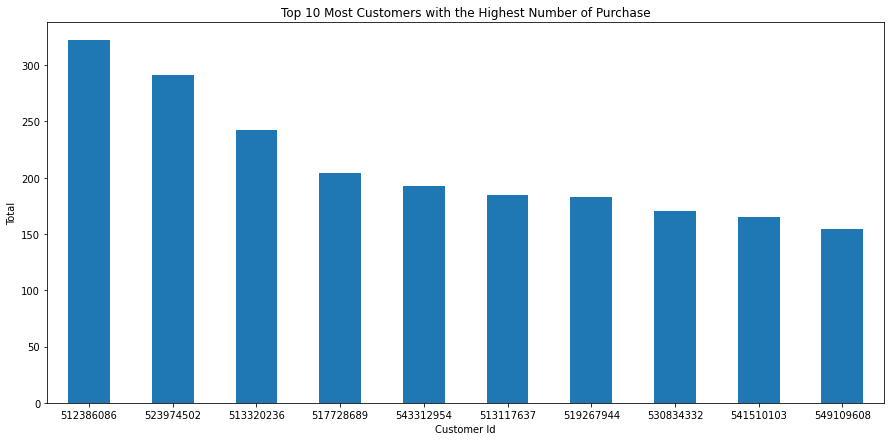

In [ ]:
# visualize top 10 most customers with the highest number of purchase
purchase = df.loc[df.event_type == 'purchase']
purchase['user_id'].value_counts().head(10).plot.bar(figsize = (15,7))
plt.title('Top 10 Most Customers with the Highest Number of Purchase')
plt.xlabel('Customer Id')
plt.xticks(rotation = 360)
plt.ylabel('Total')

### **Daily Visit in October**

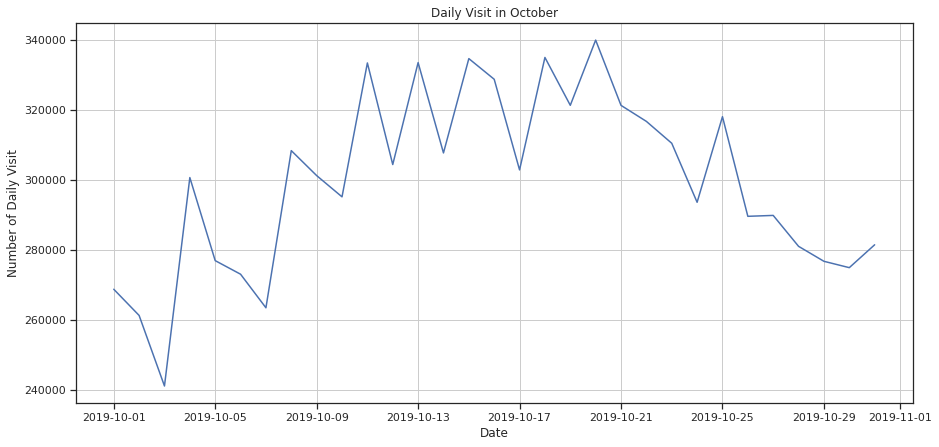

In [ ]:
# visualize daily visit in october
sns.lineplot(x = 'event_time', y = 'n_visit', data = visit)
sns.set(style = 'ticks', rc = {'figure.figsize': (15, 7)})
plt.title('Daily Visit in October')
plt.xlabel('Date')
plt.ylabel('Number of Daily Visit')
plt.grid()


### **Costumers Activity**

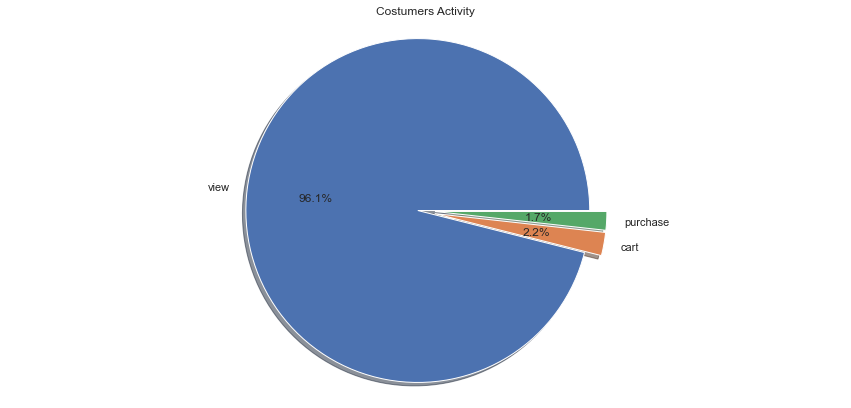

In [29]:
# visualize costumers activity
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
explode = [0, 0.1, 0.1]

sns.set(rc = {'figure.figsize': (15, 7)})
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct = '%1.1f%%')
plt.title('Costumers Activity')
plt.axis('equal')
plt.show()